# Вариант 2

In [56]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Загрузить файлы и информацией о лицах, перевести в тензорный формат и построить модель классификации.

In [181]:
import numpy as np
from PIL import Image

dataset = np.load('olivetti_faces.npy') # при необходимости укажите свой 
y = np.load('olivetti_faces_target.npy')

dataset = torch.from_numpy(dataset)
y = torch.from_numpy(y)

print(x.shape, y.shape)

(400, 64, 64) torch.Size([400])


Выведем произвольное изображение из датасета

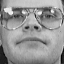

In [182]:
im = Image.fromarray(images[359]*256)
new_im = im.convert('RGB')
display(new_im)

In [183]:
transform = transforms.Compose(
    [transforms.ToTensor()])

train_size = round(0.8 * len(dataset))
trainset, testset = random_split(dataset, lengths=(train_size, len(dataset) - train_size))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
y = torch.utils.data.DataLoader(y, batch_size=4, shuffle=False)

print(len(trainset), len(testset))

320 80


In [184]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=16, kernel_size=2)
        self.fc1 = nn.Linear(60 * 60 * 16, 120)  # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 40)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 60 * 60 * 16)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_6296\2127004896.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(20)):


  0%|          | 0/20 [00:00<?, ?it/s]

Обучение закончено 3.6023311614990234 3.4843688011169434


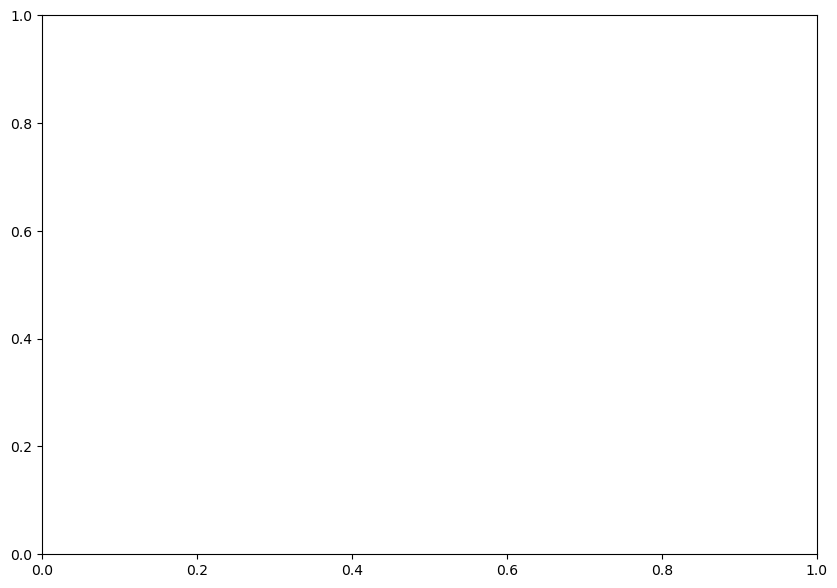

In [185]:
net = SimpleConvNet().to(device)
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
losses = []

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

# итерируемся
for epoch in tqdm_notebook(range(20)):

    running_loss = 0.0
    for batch, yb in zip(trainloader, y):
        # так получаем текущий батч
        X_batch, y_batch = batch.unsqueeze(1), yb
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.long())
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        losses.append(running_loss)
        running_loss = 0.0
            

print('Обучение закончено', losses[0], losses[-1])

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

